In [2]:
from reprophylo import *
pj = unpickle_pj('outputs/my_project.pkpj', git=False)

DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


In [7]:
genera_with_porocalices = ['Cinachyrella', 
                           'Cinachyra', 
                           'Amphitethya',
                           'Fangophilina',
                           'Acanthotetilla',
                           'Paratetilla']

genera_without_porocalices = ['Craniella',
                              'Tetilla',
                              'Astrophorida']

for genus in genera_with_porocalices:
    pj.if_this_then_that(genus, 'genus', 'present', 'porocalices')
for genus in genera_without_porocalices:
    pj.if_this_then_that(genus, 'genus', 'absent', 'porocalices')

In [8]:
pj.propagate_metadata()

The `anotate` `Project` method will produce one figure for each tree in the `Project` according to the settings. Colors can be indicated with [X11 color names](https://en.wikipedia.org/wiki/Web_colors#X11_color_names). The following settings can be controlled:

1. **`fig_folder`**: The path for the output figure file
2. **`root_meta`** and **`root_value`**: The qualifier and its value that will indicate the outroup. It can be `'mid'` and `'mid'` for a mitpoint root, or for example, `'source_organism'` and `'Some species binomial'` to set a group of leaves with a shared value as an outgroup (required).
3. **`leaf_labels_txt_meta`**: A list of qualifiers which values will be used as leaf labels, required.
4. **`leaf_node_color_meta`** and **`leaf_label_colors`**: The qualifier that detrmines clade backgrounds and a dictionary assigning colors to the qualifier's values (defaults to None and None).
5. **`ftype`** and **`fsize`**: Leaf label font and font size (default 'verdana' and 10)
6. **`node_bg_meta`** and **`node_bg_color`**: A qualifier that determines the leaf label colors and a dictionary assigning colors to its values (defaults to None and None).
7. **`node_support_dict`** and **`support_bullet_size`**: A dictionary assigning support ranges to bullet colors, and the size of the bullets (defaults to None and 5),
8. **`heat_map_meta`** and **`heat_map_colour_scheme`**: A list of qualifiers which will be the heatmap's columns, and the color scheme (defaults to None and 2 see ETE for color schemes)
9. **`pic_meta`**, **`pic_paths`**, **`pic_w`** and **`pic_h`**: You can put small images next to leaves. `pic_meta` will determine the qualifier according to which values an image will be assigend. `pic_paths` is a dictionary assigning image file paths to the qualifier's values. `pic_w` and `pic_h` are the dimensions of the images in pixels (the defaults are None for all the four keywords).  
10. **`multifurc`**: Branch support cutoff under which to multifurcate nodes (default - None).
11. **`branch_width`** and **`branch_color`** (defaults: `2` and `DimGray`)
12. **`scale`**: This will deremine the width of the tree (default 1000)
13. **`html`**: The path to which to write an html file with a list of the figures and links to the figure files (default None)

In [14]:
bg_colors = {'present':'red',
             'absent': 'white'}

supports = {'black': [100,99],
            'gray': [99,80]}

pj.annotate('./images/',               # Path to write figs to
            
            'genus', 'Geodia',         # Set OTUs that have 'Geodia'
                                       # in their 'genus' qualifier
                                       # as outgroup
            
            ['source_organism', 'record_id'], # leaf labels
            
            node_bg_meta='porocalices', # The qualifier that
                                        # will determine bg colors
            node_bg_color=bg_colors,    # The colors assigned to 
                                        # each qualifier value
            
            node_support_dict=supports, 
            
            html='./images/figs.html'
           )

pj.clear_tree_annotations()

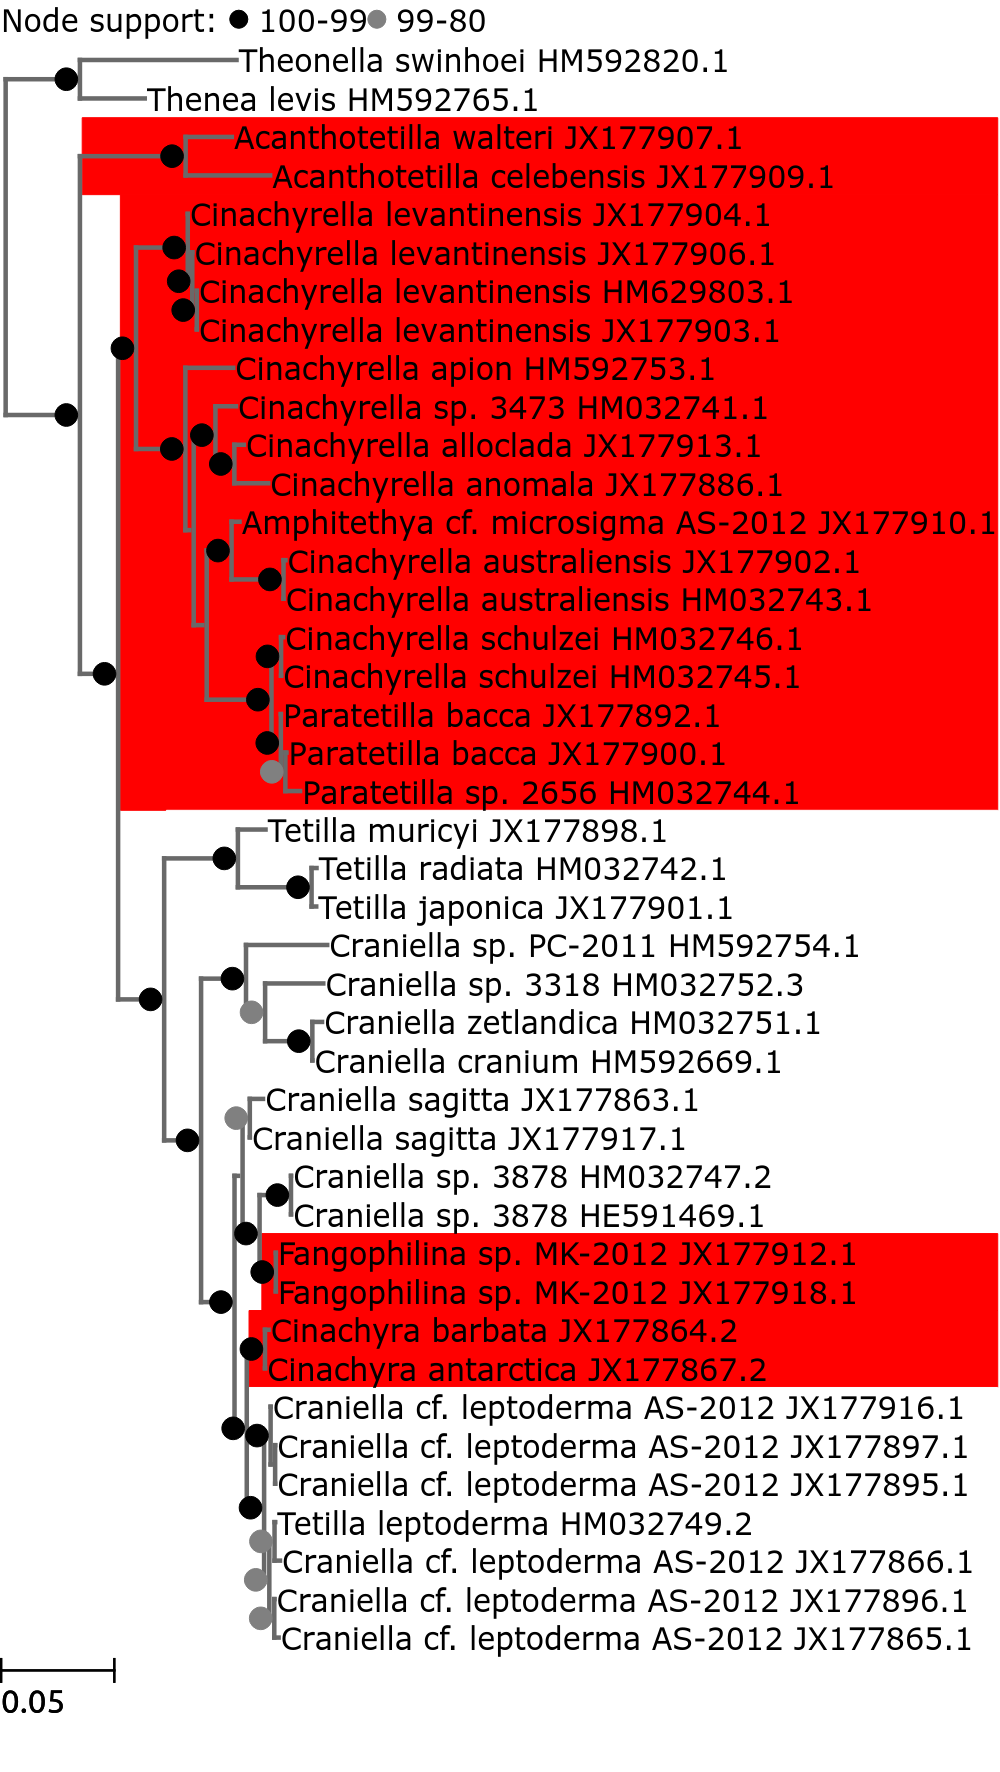

In [16]:
from IPython.display import Image
Image('./images/example1.png', width=300)

In [28]:
bg_colors = {'Cinachyrella': 'gray', 
             'Cinachyra': 'silver', 
             'Amphitethya': 'white',
             'Fangophilina':'white',
             'Acanthotetilla':'silver',
             'Paratetilla':'white',
             'Craniella': 'gray',
             'Tetilla': 'silver',
             'Astrophorida': 'white'}

pj.clear_tree_annotations()

pj.annotate('./images/',               # Path to write figs to
            
            'mid', 'mid',              # Set midpoint root
            
            ['source_organism'],        # leaf labels
            
            fsize=13,
            
            node_bg_meta='genus',       # The qualifier that
                                        # will determine bg colors
            node_bg_color=bg_colors,    # The colors assigned to 
                                        # each qualifier value
            
            heat_map_meta=['porocalyx', 'cortex', 'calthrops'],
            
            heat_map_colour_scheme=0,
 
            html='./images/figs.html'
           )

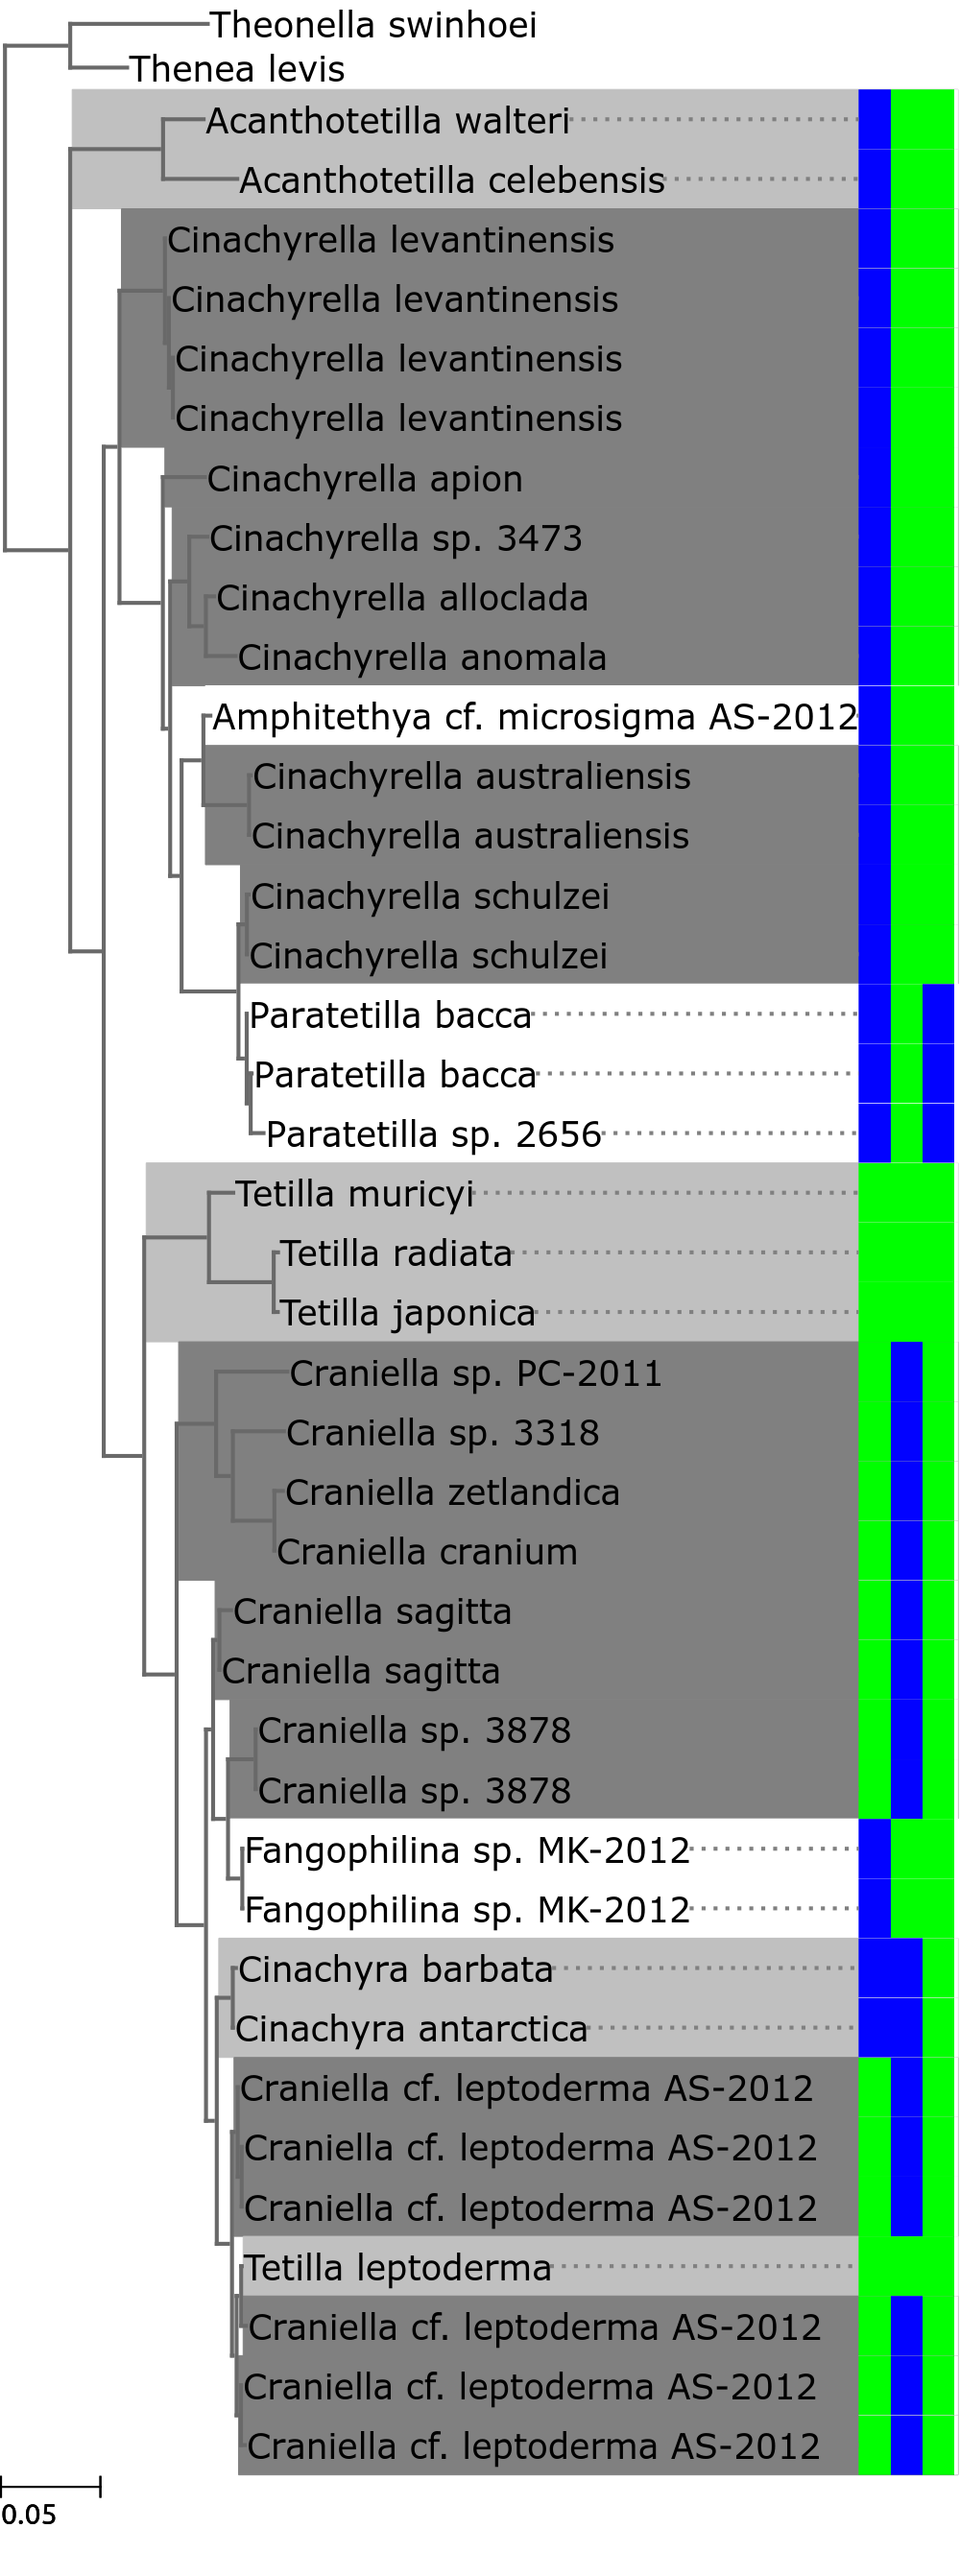

In [29]:
from IPython.display import Image
Image('./images/example2.png', width=300)